## Rejecton Sampling Method
Assume $p(x) =N(\mu=3, \sigma^2=4)+N(\mu=15, \sigma^2=16)$ is a mixture of two Gaussian distributions where $\mu$ and $\sigma^2$ indicatate mean and variance, respectively. We will implement the rejection sampling algorithm that samples data from $p(x)$.

Based on the density of $p(x)$, we will propose a distribution $q(x)$ s.t. $cq(x)$ covers $p(x)$ for a constant $c$. We will visualize $p(x)$ and $cq(x)$ in the same plot to justify our choice of $cq(x)$.

**Proposed distribution**<br>
$q(x) =N(\mu=9, \sigma^2=81)$<br><br>
**constant**<br>
$c = 5.71040735367006$ from $max(\frac{p(x)}{q(x)})$

[1] " constant =  5.71040735367006"

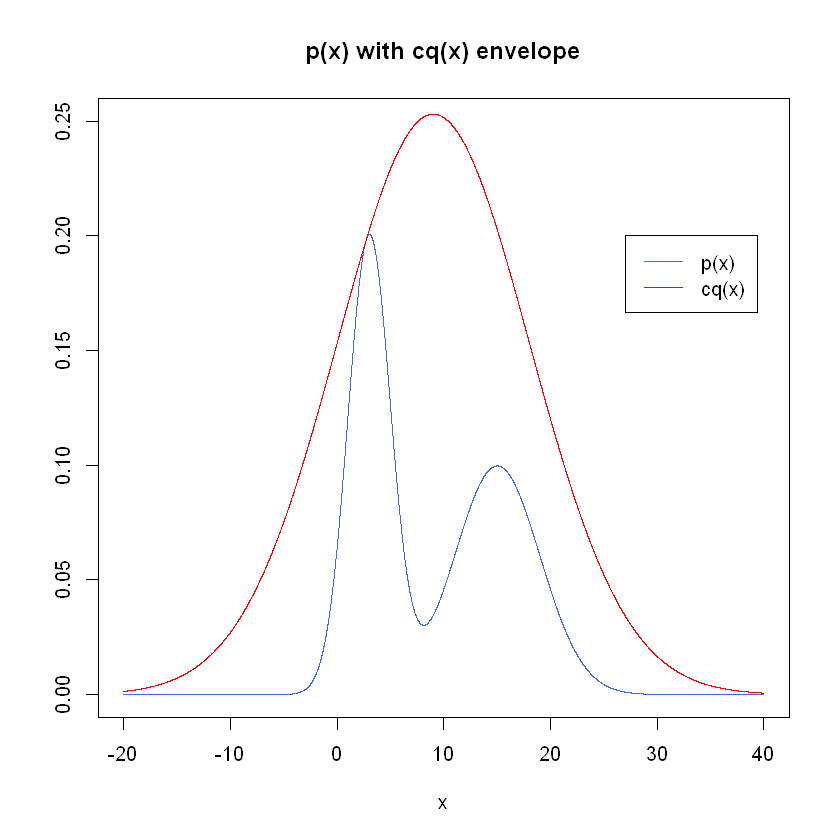

In [1]:
# define range of values to run function for plotting purposes
x <- seq(-20, 40, 0.01)

# define function for mixture of two Gaussian distributions p(x)
p <- function(x){dnorm(x, 3 , sqrt(4)) + dnorm(x, 15, sqrt(16))}

#plot p(x)
plot(x, p(x), type = 'l', col = 'royalblue', ylab = '', ylim = c(0, 0.25), main = 'p(x) with cq(x) envelope')

# define function for normal distribution q(x)
q <- function(x){dnorm(x, 9, sqrt(81))}

# compute for constant c
c <- max(p(x)/q(x))
paste(' constant = ', c)

# plot cq(x)
lines(x, c * q(x), col = 'red')

# add legend to the plot
legend(27, 0.2, c('p(x)', 'cq(x)'), lty = c(1, 1), lwd = c(1 , 1), col = c('royalblue', 'red'))

### Rejection Sampling Algorithm 
We will now implement the rejection sampling algorithm to sample 10000 data from $p(x)$ for
$x \in [-20,40]$. We will then plot
a histogram (or any other plot) to demonstrate that the sampled data roughly follows
the original distribution $p(x)$.

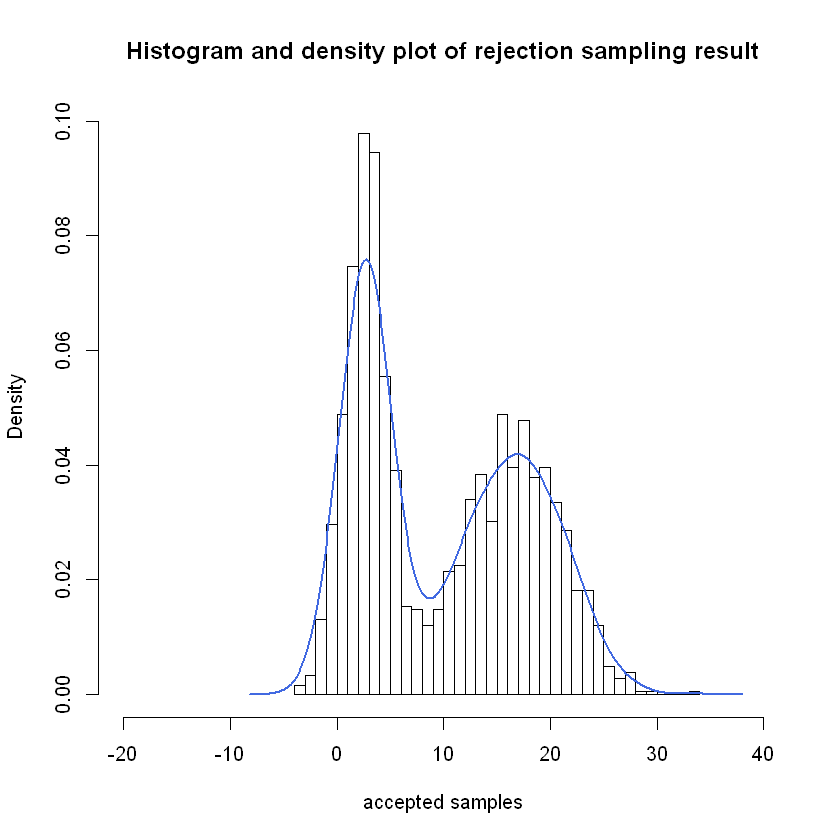

In [2]:
# fix the samples so that they don't change
set.seed(5197)

# set number of points to be sampled
n = 10000

# initialise vector that will hold accepted values from rejection sampling algorithm
accepted <- c()

# rejection sampling algorithm
for(i in 1:n){
    x <- runif(1, -20, 40)      # sample where x{-20, 40}
    u <- runif(1, 0, 1)         # sample from uniform distribution
    if(u < p(x)/(c * q(x))){    # perform rejection/acceptance test
    accepted <- c(accepted, x)
    }
}

# plot histogram with density plot overlay
hist(accepted, prob = TRUE, breaks = 30, xlim = c(-20, 40), ylim = c(0, 0.1), xlab = 'accepted samples',
     main = 'Histogram and density plot of rejection sampling result')
lines(density(accepted), col = 'royalblue', lwd = 2)

We see form the plot above that the sampled data roughly ressembles the original distribution p(x).